<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




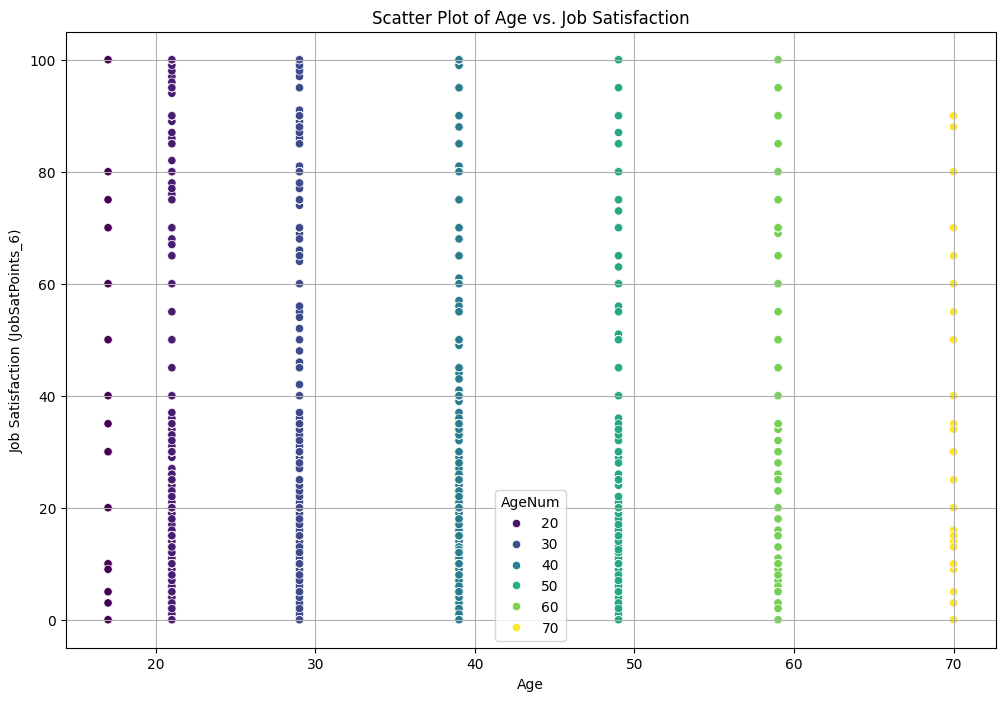

In [6]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', hue='AgeNum', palette='viridis')
plt.title('Scatter Plot of Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


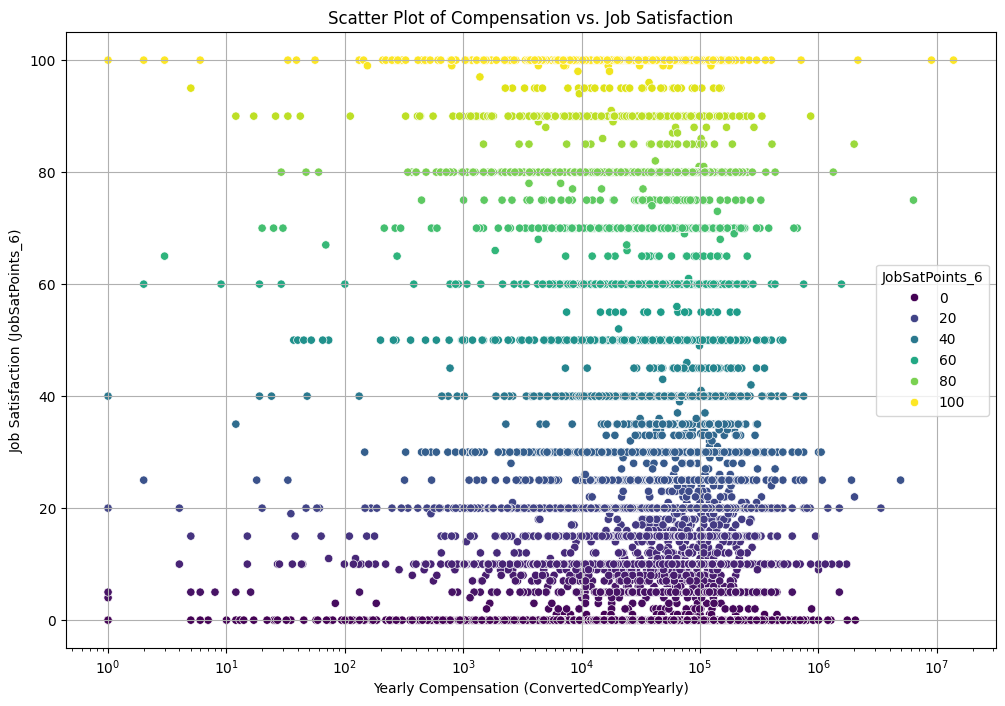

In [8]:
# Filter out rows with missing values in 'ConvertedCompYearly' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='JobSatPoints_6', palette='viridis')
plt.title('Scatter Plot of Compensation vs. Job Satisfaction')
plt.xscale('log')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


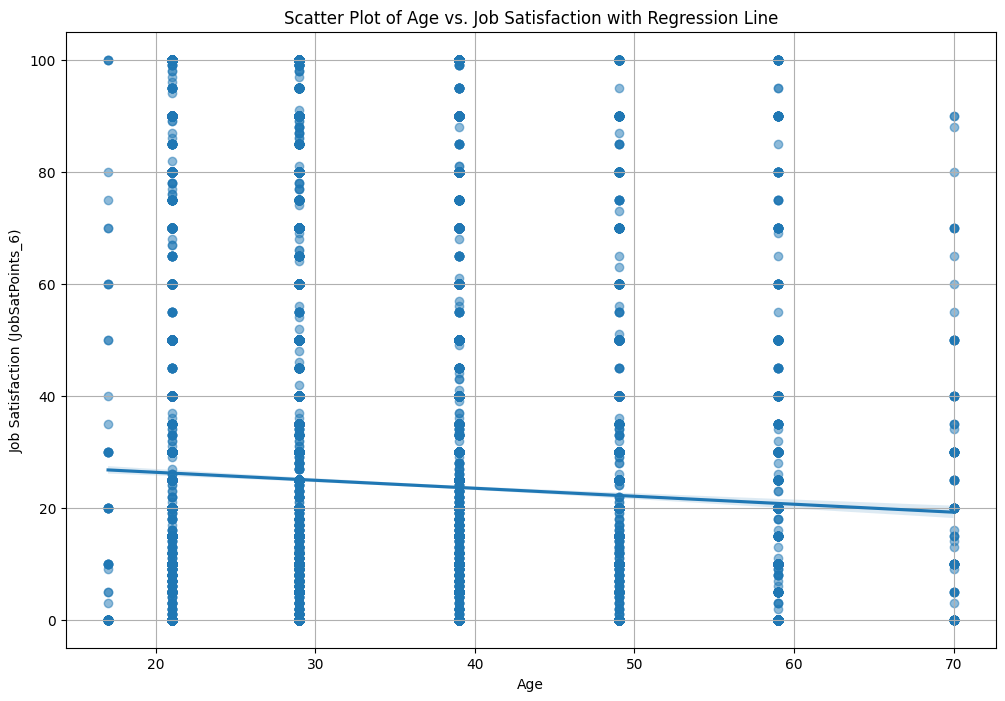

In [9]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Filter out rows with missing values in 'AgeNum' and 'JobSatPoints_6'
df_filtered = df.dropna(subset=['AgeNum', 'JobSatPoints_6'])

# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=df_filtered, x='AgeNum', y='JobSatPoints_6', scatter=True, fit_reg=True, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


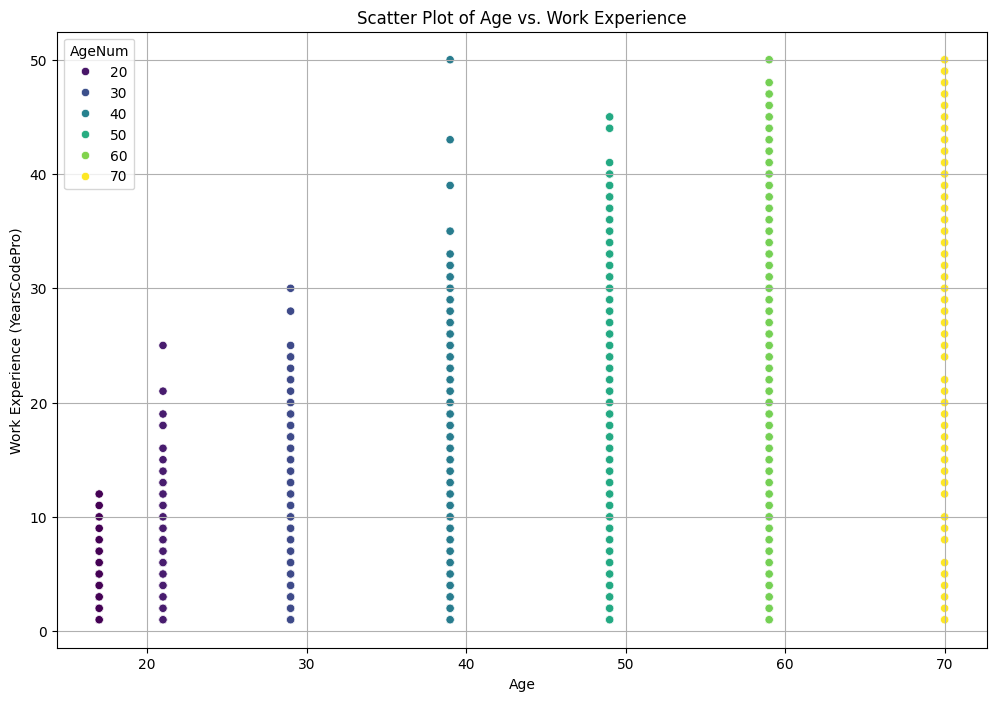

In [10]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Convert 'YearsCodePro' to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Filter out rows with missing values in 'AgeNum' and 'YearsCodePro'
df_filtered = df.dropna(subset=['AgeNum', 'YearsCodePro'])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='AgeNum', y='YearsCodePro', hue='AgeNum', palette='viridis')
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


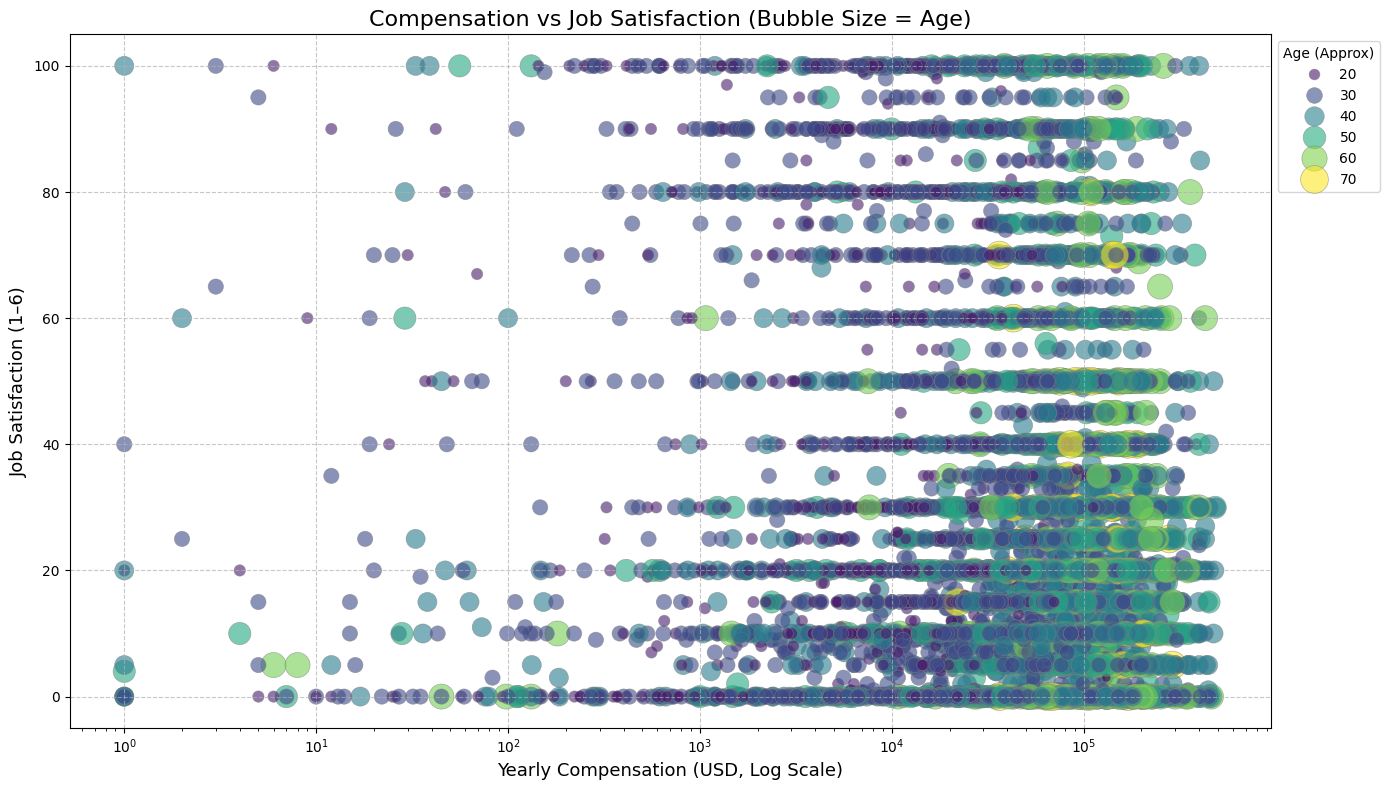

In [50]:

# Map age groups to approximate numeric values
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29,
    '35-44 years old': 39, '45-54 years old': 49, '55-64 years old': 59,
    '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop rows with missing values
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNum'])

# Optional: Filter extreme compensation values (e.g., above $500,000)
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] < 500000]

# Create the bubble plot
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='AgeNum',
    sizes=(40, 400),
    hue='AgeNum',
    palette='viridis',
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.5
)

# Customize axes and plot
plt.xscale('log')
plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=16)
plt.xlabel('Yearly Compensation (USD, Log Scale)', fontsize=13)
plt.ylabel('Job Satisfaction (1–6)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Age (Approx)', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


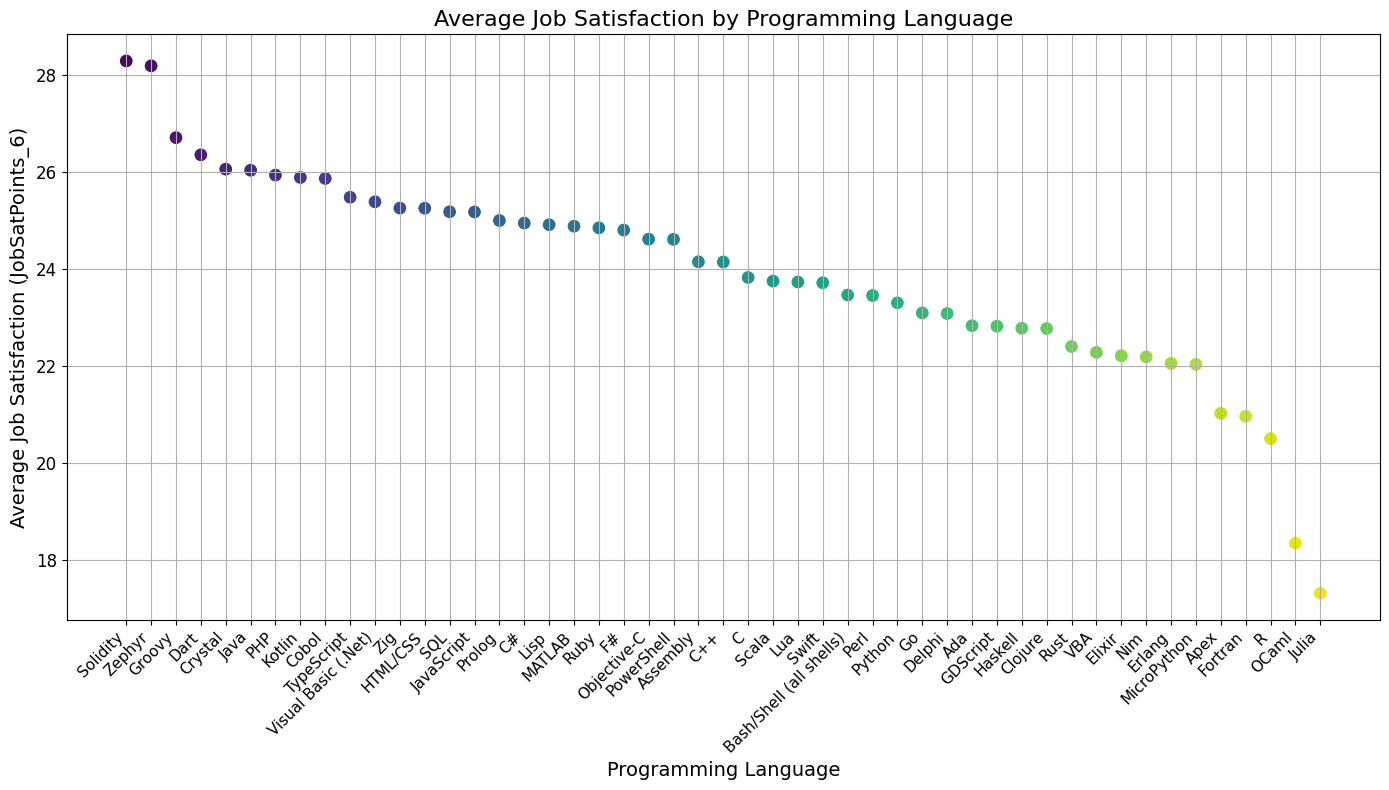

In [49]:
# Filter missing values
df_filtered = df.dropna(subset=['JobSatPoints_6', 'LanguageHaveWorkedWith'])

# Explode languages (split by semicolon)
df_exploded = df_filtered.assign(
    LanguageHaveWorkedWith=df_filtered['LanguageHaveWorkedWith'].str.split(';')
).explode('LanguageHaveWorkedWith')

# Clean language names (remove extra whitespace)
df_exploded['LanguageHaveWorkedWith'] = df_exploded['LanguageHaveWorkedWith'].str.strip()

# Calculate average job satisfaction per language
avg_job_sat = (
    df_exploded.groupby('LanguageHaveWorkedWith')['JobSatPoints_6']
    .mean()
    .reset_index()
    .sort_values(by='JobSatPoints_6', ascending=False)
)

# Optional: Sort by average satisfaction for clearer plot
languages_sorted = avg_job_sat['LanguageHaveWorkedWith']

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=avg_job_sat,
    x='LanguageHaveWorkedWith',
    y='JobSatPoints_6',
    hue='LanguageHaveWorkedWith',
    palette='viridis',
    legend=False,
    s=100
)

# Improve aesthetics
plt.title('Average Job Satisfaction by Programming Language', fontsize=16)
plt.xlabel('Programming Language', fontsize=14)
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


In [27]:
# Function to simplify using only the first response
def simplify_employment_first(status):
    if pd.isna(status):
        return "Other / Mixed"
    
    first_part = status.split(";")[0].strip().lower()

    if "prefer not to say" in first_part:
        return "Prefer not to say"
    if "employed, full-time" in first_part:
        return "Employed full-time"
    if "employed, part-time" in first_part:
        return "Employed part-time"
    if "independent contractor" in first_part or "self-employed" in first_part:
        return "Self-employed / Freelancer"
    if "student" in first_part:
        return "Student"
    if "not employed, but looking for work" in first_part:
        return "Unemployed – Looking"
    if "not employed, and not looking for work" in first_part:
        return "Unemployed – Not looking"
    if "retired" in first_part:
        return "Retired"
    
    return "Other / Mixed"

# Apply function
df['Employment_Simple'] = df['Employment'].apply(simplify_employment_first)


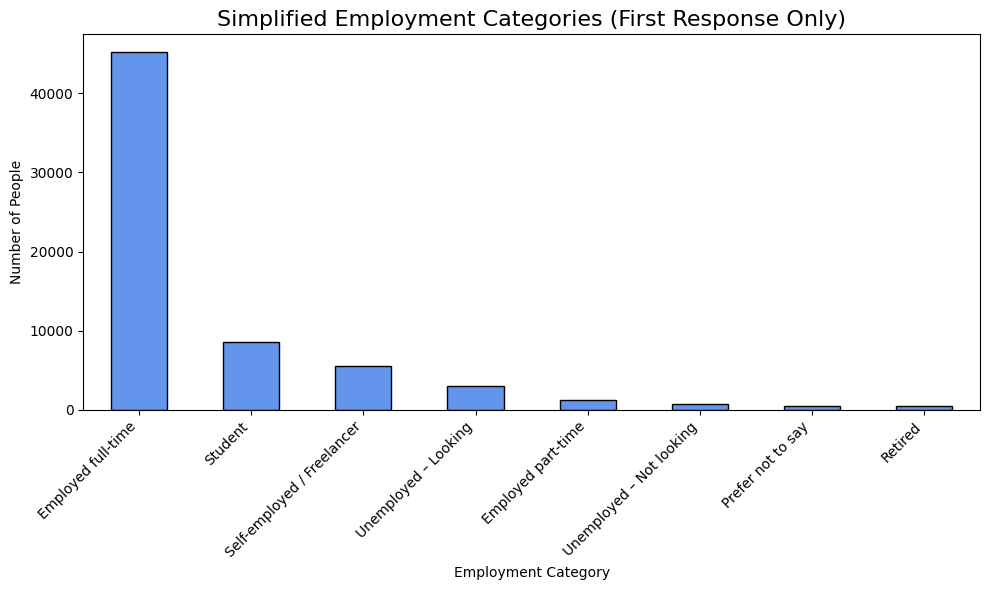

In [28]:
# Count and plot
counts = df['Employment_Simple'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', color='cornflowerblue', edgecolor='black', ax=ax)

ax.set_title("Simplified Employment Categories (First Response Only)", fontsize=16)
ax.set_ylabel("Number of People")
ax.set_xlabel("Employment Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


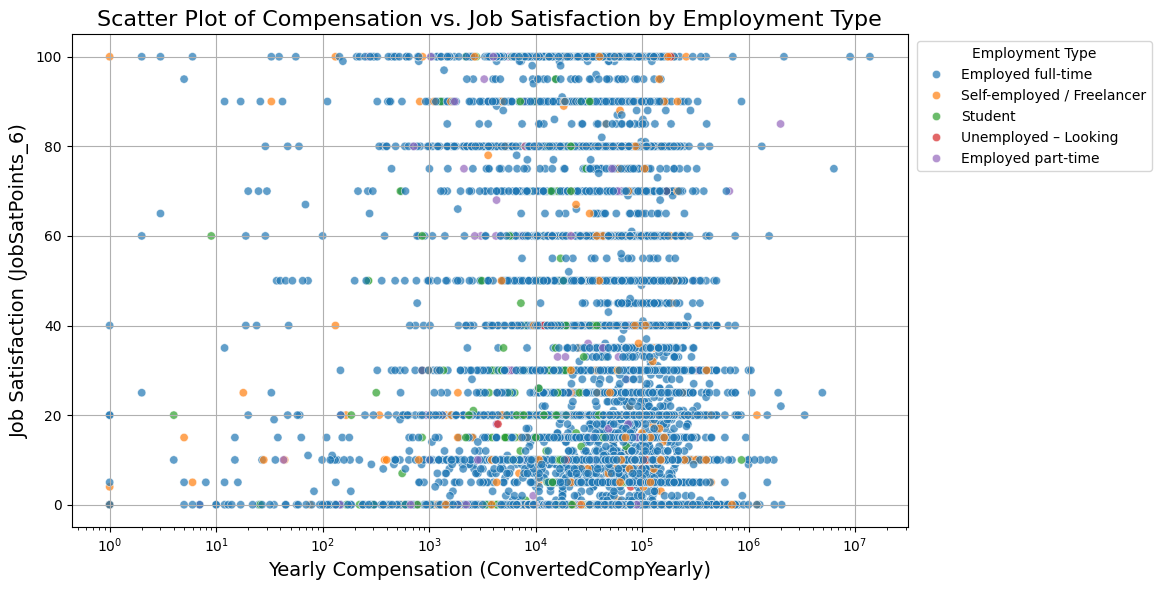

In [35]:
# Filter out rows with missing values in 'ConvertedCompYearly', 'JobSatPoints_6', and 'Employment'
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment_Simple'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment_Simple', palette='tab10', alpha=0.7)

# Enhance the plot's aesthetics
plt.title('Scatter Plot of Compensation vs. Job Satisfaction by Employment Type', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xscale('log')
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=14)
plt.legend(title='Employment Type', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.grid(True)

# Adjust the layout to ensure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [41]:
df['YearsCodePro'].unique()

array([17., 27.,  7., 11., 25., 12., 10.,  3., 18., 37., 15., 20.,  6.,
        2., 16.,  8., 14.,  4., 45.,  1., 24., 29.,  5., 30., 26.,  9.,
       33., 13., 35., 23., 22., 31., 19., 21., 28., 34., 32., 40., 50.,
       39., 44., 42., 41., 36., 38., 43., 47., 48., 46., 49.])

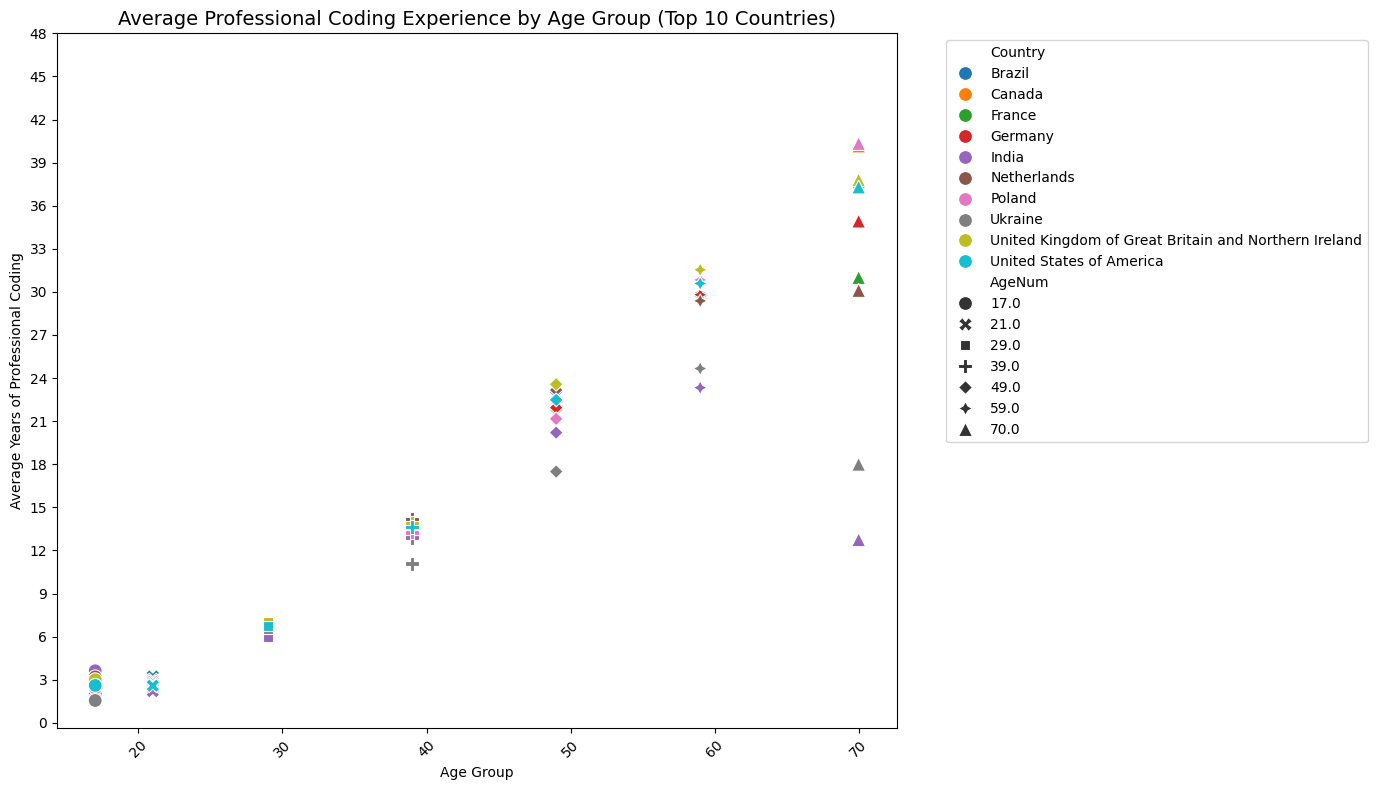

In [43]:
# Convert the 'Age' column to numeric values for better plotting
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 21, '25-34 years old': 29, '35-44 years old': 39,
    '45-54 years old': 49, '55-64 years old': 59, '65 years or older': 70, 'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Drop rows with missing values in the key columns
df = df.dropna(subset=['Age', 'Country', 'YearsCodePro'])


# Get top 10 countries by response count
top_countries = df['Country'].value_counts().nlargest(10).index
df_top = df[df['Country'].isin(top_countries)]

# Group by Country and Age, calculate mean YearsCodePro
grouped = df_top.groupby(['Country', 'AgeNum'])['YearsCodePro'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=grouped,
    x='AgeNum',
    y='YearsCodePro',
    hue='Country',
    style='AgeNum',
    palette='tab10',
    s=100
)

plt.title('Average Professional Coding Experience by Age Group (Top 10 Countries)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Average Years of Professional Coding')
plt.yticks(ticks=range(0, 51, 3))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
